# Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Step 2: Data Wrangling

### Load and read the data

In [8]:
daily = pd.read_csv("CSB_2021-2023_Daily_Weather.csv")
hourly = pd.read_csv("CSB_2021-2023_Hourly_Weather.csv")


display(daily.tail())
display(daily.info())
# 911 rows, 8 columns
print()

display(hourly.head())
display(hourly.info())
# 911 * 24 = 21864 rows, 9 columns('hour')




,Date,Casual,Member,Total_rides,weathercode (wmo code),temperature_2m_mean (°C),apparent_temperature_mean (°C),windspeed_10m_max (km/h)
906,2023-06-26,4602,8373,12975,63,25.3,28.8,10.7
907,2023-06-27,4305,8542,12847,63,23.7,26.9,14.4
908,2023-06-28,5691,10150,15841,3,22.8,23.6,16.0
909,2023-06-29,5009,8807,13816,1,23.6,25.2,9.2
910,2023-06-30,4988,8101,13089,65,23.6,26.5,10.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            911 non-null    object 
 1   Casual                          911 non-null    int64  
 2   Member                          911 non-null    int64  
 3   Total_rides                     911 non-null    int64  
 4   weathercode (wmo code)          911 non-null    int64  
 5   temperature_2m_mean (°C)        911 non-null    float64
 6   apparent_temperature_mean (°C)  911 non-null    float64
 7   windspeed_10m_max (km/h)        911 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 57.1+ KB


None

,Date,Hour,Casual,Member,Total_rides,temperature_2m (°C),relativehumidity_2m (%),weathercode (wmo code),windspeed_10m (km/h)
0,2021-01-01,0,20.0,26.0,46.0,2.4,90,1,10.2
1,2021-01-01,1,23.0,23.0,46.0,1.8,88,1,10.0
2,2021-01-01,2,20.0,28.0,48.0,1.1,87,2,10.1
3,2021-01-01,3,9.0,7.0,16.0,1.6,81,2,10.6
4,2021-01-01,4,7.0,5.0,12.0,1.6,77,2,9.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21864 entries, 0 to 21863
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     21864 non-null  object 
 1   Hour                     21864 non-null  int64  
 2   Casual                   21853 non-null  float64
 3   Member                   21853 non-null  float64
 4   Total_rides              21853 non-null  float64
 5   temperature_2m (°C)      21864 non-null  float64
 6   relativehumidity_2m (%)  21864 non-null  int64  
 7   weathercode (wmo code)   21864 non-null  int64  
 8   windspeed_10m (km/h)     21864 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.5+ MB


None

### Remove missing value

In [9]:
hourly.dropna(axis=0, inplace=True)
hourly.isnull().sum()
hourly.info()
# Now there's no missing value in 'hourly' dataset

<class 'pandas.core.frame.DataFrame'>
Index: 21853 entries, 0 to 21852
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     21853 non-null  object 
 1   Hour                     21853 non-null  int64  
 2   Casual                   21853 non-null  float64
 3   Member                   21853 non-null  float64
 4   Total_rides              21853 non-null  float64
 5   temperature_2m (°C)      21853 non-null  float64
 6   relativehumidity_2m (%)  21853 non-null  int64  
 7   weathercode (wmo code)   21853 non-null  int64  
 8   windspeed_10m (km/h)     21853 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.7+ MB


In [10]:
daily.dropna(axis=0, inplace=True)
daily.isnull().sum()
daily.info()
# There's also no missing value in 'daily' dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            911 non-null    object 
 1   Casual                          911 non-null    int64  
 2   Member                          911 non-null    int64  
 3   Total_rides                     911 non-null    int64  
 4   weathercode (wmo code)          911 non-null    int64  
 5   temperature_2m_mean (°C)        911 non-null    float64
 6   apparent_temperature_mean (°C)  911 non-null    float64
 7   windspeed_10m_max (km/h)        911 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 57.1+ KB


### Data types conversion (If needed)

In [11]:
# The 'Date' column in both the daily and hourly datasets is currently in the 'object' data type. 

print(daily.dtypes)
print()
print(hourly.dtypes)

Date                               object
Casual                              int64
Member                              int64
Total_rides                         int64
weathercode (wmo code)              int64
temperature_2m_mean (°C)          float64
apparent_temperature_mean (°C)    float64
windspeed_10m_max (km/h)          float64
dtype: object

Date                        object
Hour                         int64
Casual                     float64
Member                     float64
Total_rides                float64
temperature_2m (°C)        float64
relativehumidity_2m (%)      int64
weathercode (wmo code)       int64
windspeed_10m (km/h)       float64
dtype: object


In [12]:
# I intend to convert it into datetime format as I plan to analyze it using time series methods.

daily['Date'] = pd.to_datetime(daily['Date'])
hourly['Date'] = pd.to_datetime(hourly['Date'])
print(daily['Date'].dtypes)
print()
print(hourly['Date'].dtypes)


datetime64[ns]

datetime64[ns]


### Create new features

In [13]:
# Seperate 'Date' column into Year, Month and Day

daily["Year"] = daily['Date'].dt.year
daily["Month"] = daily['Date'].dt.month
daily["Day"] = daily['Date'].dt.day
daily.head()


,Date,Casual,Member,Total_rides,weathercode (wmo code),temperature_2m_mean (°C),apparent_temperature_mean (°C),windspeed_10m_max (km/h),Year,Month,Day
0,2021-01-01,371,590,961,63,2.3,-0.9,10.6,2021,1,1
1,2021-01-02,2874,2844,5718,61,7.6,4.8,19.1,2021,1,2
2,2021-01-03,495,1133,1628,63,3.9,0.9,13.0,2021,1,3
3,2021-01-04,907,2074,2981,3,4.1,1.0,13.3,2021,1,4
4,2021-01-05,1057,2004,3061,51,4.0,1.4,9.2,2021,1,5


In [14]:
# seperate 'Date' into Weekdays and Weekends

daily['Dayofweek'] = daily['Date'].dt.dayofweek 
daily['Weekdays'] = daily['Date'].dt.dayofweek 
daily['Weekends'] = daily['Date'].dt.dayofweek 
display(daily.head())

print()
hourly['Dayofweek'] = hourly['Date'].dt.dayofweek 
hourly['Weekdays'] = hourly['Date'].dt.dayofweek 
hourly['Weekends'] = hourly['Date'].dt.dayofweek 
display(hourly.head())


,Date,Casual,Member,Total_rides,weathercode (wmo code),temperature_2m_mean (°C),apparent_temperature_mean (°C),windspeed_10m_max (km/h),Year,Month,Day,Dayofweek,Weekdays,Weekends
0,2021-01-01,371,590,961,63,2.3,-0.9,10.6,2021,1,1,4,4,4
1,2021-01-02,2874,2844,5718,61,7.6,4.8,19.1,2021,1,2,5,5,5
2,2021-01-03,495,1133,1628,63,3.9,0.9,13.0,2021,1,3,6,6,6
3,2021-01-04,907,2074,2981,3,4.1,1.0,13.3,2021,1,4,0,0,0
4,2021-01-05,1057,2004,3061,51,4.0,1.4,9.2,2021,1,5,1,1,1


,Date,Hour,Casual,Member,Total_rides,temperature_2m (°C),relativehumidity_2m (%),weathercode (wmo code),windspeed_10m (km/h),Dayofweek,Weekdays,Weekends
0,2021-01-01,0,20.0,26.0,46.0,2.4,90,1,10.2,4,4,4
1,2021-01-01,1,23.0,23.0,46.0,1.8,88,1,10.0,4,4,4
2,2021-01-01,2,20.0,28.0,48.0,1.1,87,2,10.1,4,4,4
3,2021-01-01,3,9.0,7.0,16.0,1.6,81,2,10.6,4,4,4
4,2021-01-01,4,7.0,5.0,12.0,1.6,77,2,9.9,4,4,4


In [15]:
# Make new column of 'Holidays' to compare working day between holiday
from datetime import date
import holidays

US_holidays = holidays.US()

daily['Holidays'] = 0

for index, row in daily.iterrows():
    if row['Date'] in US_holidays:
        daily.at[index, 'Holidays'] = 1
    else:
        daily.at[index, 'Holidays'] = 0

daily.loc[daily['Holidays'] == 0, 'is_holiday'] = 'No'
daily.loc[daily['Holidays'] == 1, 'is_holiday'] = 'Yes'


/var/folders/ll/22q89fv95hbb3yt5tf_x_5lc0000gp/T/ipykernel_52222/4266354765.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  daily.loc[daily['Holidays'] == 0, 'is_holiday'] = 'No'


In [16]:
hourly['Holidays'] = 0

for index, row in hourly.iterrows():
    if row['Date'] in US_holidays:
        hourly.at[index, 'Holidays'] = 1
    else:
        hourly.at[index, 'Holidays'] = 0

hourly.loc[hourly['Holidays'] == 0, 'is_holiday'] = 'No'
hourly.loc[hourly['Holidays'] == 1, 'is_holiday'] = 'Yes'

/var/folders/ll/22q89fv95hbb3yt5tf_x_5lc0000gp/T/ipykernel_52222/700803671.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  hourly.loc[hourly['Holidays'] == 0, 'is_holiday'] = 'No'


In [17]:
# Make new column of 'Season' to check seasonal trend

def get_Season(date):
    if date.month in [3, 4, 5]:
        return 1
    elif date.month in [6, 7, 8]:
        return 2
    elif date.month in [9, 10, 11]:
        return 3
    else:
        return 4
daily['Season'] = daily['Date'].apply(get_Season)

daily.loc[daily['Season'] == 1, 'Season'] = 'Winter'
daily.loc[daily['Season'] == 2, 'Season'] = 'Spring'
daily.loc[daily['Season'] == 3, 'Season'] = 'Summer'
daily.loc[daily['Season'] == 4, 'Season'] = 'Fall'

daily.sample(10)

/var/folders/ll/22q89fv95hbb3yt5tf_x_5lc0000gp/T/ipykernel_52222/1816993360.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Winter' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  daily.loc[daily['Season'] == 1, 'Season'] = 'Winter'


,Date,Casual,Member,Total_rides,weathercode (wmo code),temperature_2m_mean (°C),apparent_temperature_mean (°C),windspeed_10m_max (km/h),Year,Month,Day,Dayofweek,Weekdays,Weekends,Holidays,is_holiday,Season
521,2022-06-06,5268,7140,12408,1,21.9,20.9,17.4,2022,6,6,0,0,0,0,No,Spring
530,2022-06-15,5440,7987,13427,3,25.8,29.0,11.5,2022,6,15,2,2,2,0,No,Spring
880,2023-05-31,5281,10214,15495,1,18.5,17.8,10.2,2023,5,31,2,2,2,0,No,Winter
481,2022-04-27,3548,6703,10251,3,11.2,6.8,24.5,2022,4,27,2,2,2,0,No,Winter
651,2022-10-14,4975,7895,12870,3,15.2,14.1,12.7,2022,10,14,4,4,4,0,No,Summer
709,2022-12-11,2298,4359,6657,51,6.0,3.6,10.5,2022,12,11,6,6,6,0,No,Fall
657,2022-10-20,3842,7655,11497,0,8.8,5.4,16.4,2022,10,20,3,3,3,0,No,Summer
686,2022-11-18,2168,5552,7720,51,2.6,-1.7,17.7,2022,11,18,4,4,4,0,No,Summer
365,2022-01-01,1788,1664,3452,63,14.1,14.4,13.7,2022,1,1,5,5,5,1,Yes,Fall
223,2021-08-12,3481,4959,8440,1,30.1,34.5,12.2,2021,8,12,3,3,3,0,No,Spring


In [18]:
# Seasons

def get_Season(date):
    if date.month in [3, 4, 5]:
        return 1
    elif date.month in [6, 7, 8]:
        return 2
    elif date.month in [9, 10, 11]:
        return 3
    else:
        return 4
hourly['Season'] = hourly['Date'].apply(get_Season)

hourly.loc[hourly['Season'] == 1, 'Season'] = 'Winter'
hourly.loc[hourly['Season'] == 2, 'Season'] = 'Spring'
hourly.loc[hourly['Season'] == 3, 'Season'] = 'Summer'
hourly.loc[hourly['Season'] == 4, 'Season'] = 'Fall'

hourly.sample(10)

/var/folders/ll/22q89fv95hbb3yt5tf_x_5lc0000gp/T/ipykernel_52222/3433111734.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Winter' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hourly.loc[hourly['Season'] == 1, 'Season'] = 'Winter'


,Date,Hour,Casual,Member,Total_rides,temperature_2m (°C),relativehumidity_2m (%),weathercode (wmo code),windspeed_10m (km/h),Dayofweek,Weekdays,Weekends,Holidays,is_holiday,Season
10573,2022-03-17,23,85.0,115.0,200.0,10.9,96,0,4.7,3,3,3,0,No,Winter
17959,2023-01-19,17,136.0,498.0,634.0,9.9,94,53,2.3,3,3,3,0,No,Fall
6942,2021-10-17,14,499.0,446.0,945.0,17.0,42,1,21.5,6,6,6,0,No,Summer
9591,2022-02-05,0,44.0,76.0,120.0,-0.1,58,2,15.4,5,5,5,0,No,Fall
12203,2022-05-24,21,152.0,222.0,374.0,15.8,69,3,7.1,1,1,1,0,No,Winter
5683,2021-08-26,3,9.0,6.0,15.0,24.6,91,1,6.6,3,3,3,0,No,Spring
12998,2022-06-27,0,45.0,36.0,81.0,24.6,74,1,8.6,0,0,0,0,No,Spring
5432,2021-08-15,16,429.0,358.0,787.0,27.3,58,1,6.6,6,6,6,0,No,Spring
7517,2021-11-10,13,161.0,402.0,563.0,18.7,56,0,9.6,2,2,2,0,No,Summer
10967,2022-04-03,9,288.0,241.0,529.0,9.9,70,0,3.3,6,6,6,0,No,Winter


#

# Step 3: Perform Exploratory Data Analysis with some hypotheses

### Hypothesis 1: Most of the businesses have rush hours and weak hours. It should not be an exception for bike rentals as well.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


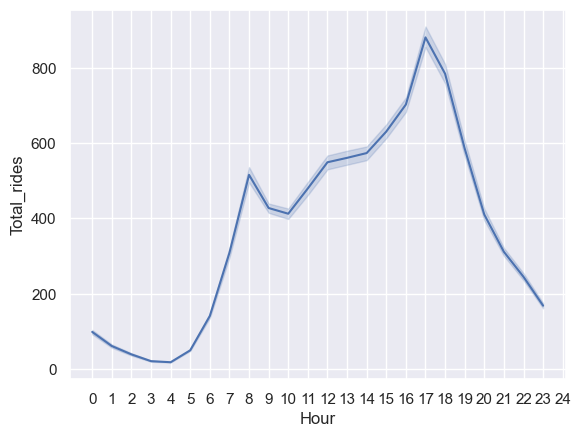

In [19]:
# Hourly trend graph 
sns.set_theme(style="darkgrid")
sns.lineplot(x="Hour", y="Total_rides", data=hourly)
plt.xticks(range(25), range(25))
plt.show()


### Hypothesis 2: Differences in ride patterns are expected between weekdays and weekends, as well as between registered and casual users

/var/folders/ll/22q89fv95hbb3yt5tf_x_5lc0000gp/T/ipykernel_52222/1774252644.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'weekdays' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  hourly.loc[hourly['Dayofweek'] == 0, 'is_weekend'] = 'weekdays'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.1

([<matplotlib.axis.XTick at 0x12eee37d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24')])

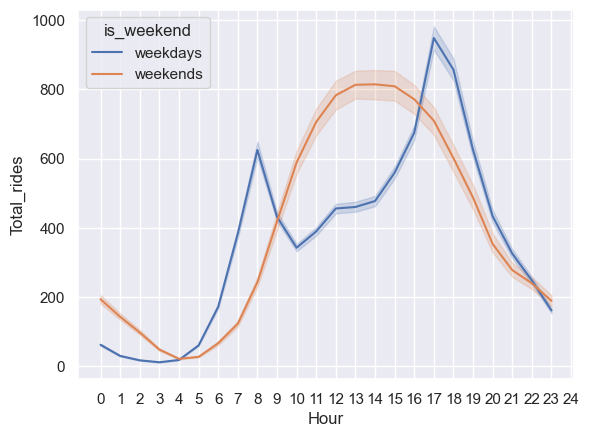

In [20]:
# In weekdays, rides rental increases on 8 and 17 for commuting.

hourly.loc[hourly['Dayofweek'] == 0, 'is_weekend'] = 'weekdays'
hourly.loc[hourly['Dayofweek'] == 1, 'is_weekend'] = 'weekdays'
hourly.loc[hourly['Dayofweek'] == 2, 'is_weekend'] = 'weekdays'
hourly.loc[hourly['Dayofweek'] == 3, 'is_weekend'] = 'weekdays'
hourly.loc[hourly['Dayofweek'] == 4, 'is_weekend'] = 'weekdays'

hourly.loc[hourly['Dayofweek'] == 5, 'is_weekend'] = 'weekends'
hourly.loc[hourly['Dayofweek'] == 6, 'is_weekend'] = 'weekends'

sns.set_theme(style="darkgrid")
sns.lineplot(x="Hour", y="Total_rides", data=hourly, hue='is_weekend')
plt.xticks(range(25), range(25))




### Hypothesis 3: Demand for bikes might be changed on a rainy day as compared to a sunny day. Similarly, people prefer to go out on less humid days.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

([<matplotlib.axis.XTick at 0x12ec97610>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

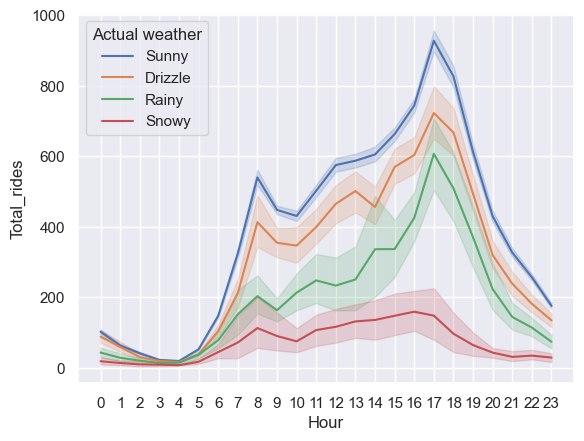

In [21]:
# Assign weather conditions to numerical codes
weather_mapping = {0: 'Sunny',1: 'Sunny',2: 'Sunny',3: 'Sunny',
                   51: 'Drizzle', 53: 'Drizzle', 55: 'Drizzle',
                   61: 'Rainy', 63: 'Rainy', 65:'Rainy',
                   71: 'Snowy', 73: 'Snowy', 75: 'Snowy'}
hourly['Actual weather'] = hourly['weathercode (wmo code)'].map(weather_mapping)

sns.set_theme(style="darkgrid")
sns.lineplot(x="Hour", y="Total_rides", data=hourly, hue='Actual weather')
plt.xticks(range(24), range(24))

### Hypothesis 3: Not only hot days but also the level of humidity is likely to influence bicycle usage

/var/folders/ll/22q89fv95hbb3yt5tf_x_5lc0000gp/T/ipykernel_52222/3016125026.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Comfortable Humid' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  hourly.loc[(hourly['relativehumidity_2m (%)'] < 50), 'Degree of Humidity'] = 'Comfortable Humid'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Librar

Text(0.5, 1.0, 'Humidity Degree and Bike Rental Distribution')

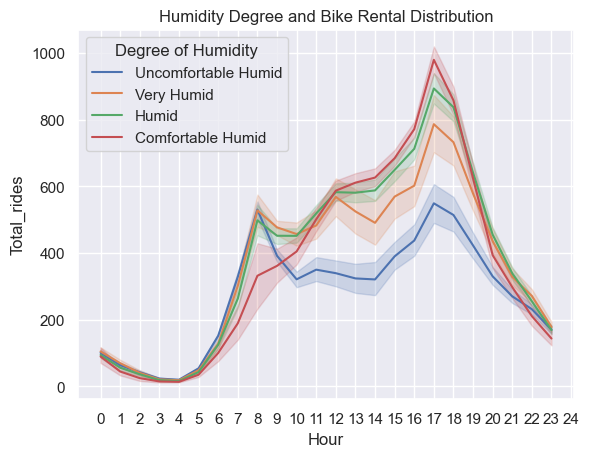

In [22]:
# Humidity in Washington DC: ~ 50% : comfortable humid / 50~70% : humid / 70~80% : very humid / 80%~ : uncomfortable humid

hourly.loc[(hourly['relativehumidity_2m (%)'] < 50), 'Degree of Humidity'] = 'Comfortable Humid'
hourly.loc[(hourly['relativehumidity_2m (%)'] >= 50) & (hourly['relativehumidity_2m (%)'] < 70), 'Degree of Humidity'] = 'Humid'
hourly.loc[(hourly['relativehumidity_2m (%)'] >= 70) & (hourly['relativehumidity_2m (%)'] < 80), 'Degree of Humidity'] = 'Very Humid'
hourly.loc[(hourly['relativehumidity_2m (%)'] >= 80), 'Degree of Humidity'] = 'Uncomfortable Humid'

sns.set_theme(style="darkgrid")
sns.lineplot(x="Hour", y="Total_rides", data=hourly, hue='Degree of Humidity')
plt.xticks(range(25), range(25))
plt.title("Humidity Degree and Bike Rental Distribution")


### Hypothesis 4: Businesses often rely on registered customers more than casual users. 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

([<matplotlib.axis.XTick at 0x12f008690>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

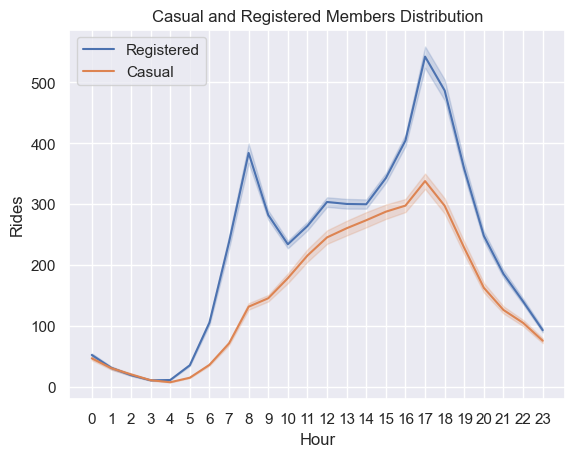

In [23]:
# Registerd vs casual users

sns.set_theme(style="darkgrid")
sns.lineplot(x="Hour", y="Member", data=hourly, label="Registered")
sns.lineplot(x="Hour", y="Casual", data=hourly, label="Casual")


plt.xlabel("Hour")
plt.ylabel("Rides")
plt.title("Casual and Registered Members Distribution")
plt.legend()
plt.xticks(range(24), range(24))


# Step 4: Looking into Trip history data

### Prepare the data(2021 - 2023)

In [3]:
trip21 = pd.read_csv('2021_trip.csv')
trip22 = pd.read_csv('2022_trip.csv')
trip23 = pd.read_csv('2023_trip.csv')

In [4]:
trip21.head()

,started_at,ended_at,member_casual,trip_duration,year,month,day
0,2021-01-08 17:58:48,2021-01-08 18:25:23,casual,0 days 00:26:35,2021,1,8
1,2021-01-08 22:05:51,2021-01-08 22:23:52,member,0 days 00:18:01,2021,1,8
2,2021-01-21 17:20:31,2021-01-21 17:23:24,member,0 days 00:02:53,2021,1,21
3,2021-01-28 10:06:30,2021-01-28 10:20:54,member,0 days 00:14:24,2021,1,28
4,2021-01-11 12:09:45,2021-01-11 12:20:15,casual,0 days 00:10:30,2021,1,11


In [6]:
trip22.head()

,started_at,ended_at,member_casual,trip_duration,year,month,day
0,2022-01-06 18:39:28,2022-01-06 18:43:03,member,0 days 00:03:35,2022,1,6
1,2022-01-31 19:21:22,2022-01-31 19:27:33,member,0 days 00:06:11,2022,1,31
2,2022-01-07 15:28:39,2022-01-07 15:31:01,member,0 days 00:02:22,2022,1,7
3,2022-01-27 20:09:25,2022-01-27 20:37:02,casual,0 days 00:27:37,2022,1,27
4,2022-01-07 16:14:28,2022-01-07 16:16:13,member,0 days 00:01:45,2022,1,7


In [5]:
trip23.head()

,started_at,ended_at,member_casual,trip_duration,year,month,day
0,2023-01-04 19:34:07,2023-01-04 19:39:29,member,0 days 00:05:22,2023,1,4
1,2023-01-27 15:26:38,2023-01-27 19:21:36,member,0 days 03:54:58,2023,1,27
2,2023-01-05 20:44:38,2023-01-05 20:51:18,member,0 days 00:06:40,2023,1,5
3,2023-01-03 17:45:14,2023-01-03 17:57:23,member,0 days 00:12:09,2023,1,3
4,2023-01-03 05:18:46,2023-01-03 05:25:50,member,0 days 00:07:04,2023,1,3


In [11]:
file_paths = ['2021_trip.csv', '2022_trip.csv', '2023_trip.csv']
dataframes = [pd.read_csv(file) for file in file_paths]
combined_df = pd.concat(dataframes)
combined_df.to_csv('trip.csv', index=False)


In [13]:
trip = pd.read_csv('trip.csv')
trip.head()

,started_at,ended_at,member_casual,trip_duration,year,month,day
0,2021-01-08 17:58:48,2021-01-08 18:25:23,casual,0 days 00:26:35,2021,1,8
1,2021-01-08 22:05:51,2021-01-08 22:23:52,member,0 days 00:18:01,2021,1,8
2,2021-01-21 17:20:31,2021-01-21 17:23:24,member,0 days 00:02:53,2021,1,21
3,2021-01-28 10:06:30,2021-01-28 10:20:54,member,0 days 00:14:24,2021,1,28
4,2021-01-11 12:09:45,2021-01-11 12:20:15,casual,0 days 00:10:30,2021,1,11


### clean the data

In [7]:
# If trip duration is longer than a day, that would be a mistake by user who forgot to return it. 

In [ ]:
# Likewise, if the trip duration is shorter than a minute, that would be a mistake by user as well.

# Step 5: Build ML Regression